# pandas 데이터 합치기

- pandas는 두 개 이상의 데이터 프레임을 하나로 합치는
- **병합(merge)**이나 **연결(concate)**을 지원
- merge(), join(), concat()

In [1]:
# 필요 모듈
import pandas as pd
import numpy as np
import random

In [2]:
# 여러 변수 출력 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 1. 데이터 병합

### 1) merge() 명령을 이용한 데이터 프레임 병합

- **merge** : 
    - 두 데이터 프레임의 공통 열(column)이나 인덱스(index)를 기준으로 합침
    - **key** : 기준이 되는 열 데이터

#### 형식
- df.merge(df1) : 두 df를 병합시켜 준다.
- 기본은 inner join : 양쪽에 동일하게 존재하는 키만 표시
- key : 기준열을 의미
    -  실제 데이터 필드거나 행 인덱스 일 수 있다.
- 병합방식
    - inner join :  양쪽 df에서 모두 키가 존재하는 data만표시
    - outer join :  한쪽에만 키가 존재하면 data를 표시
    - 병합방식을 설정 : how=inner(생략가능), how=outer 

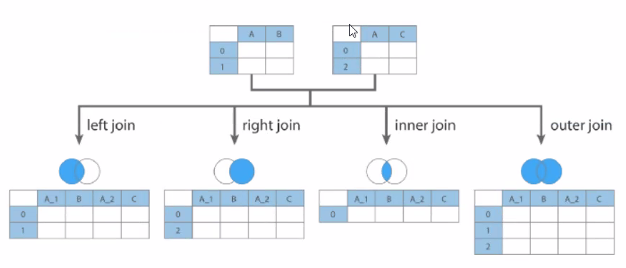

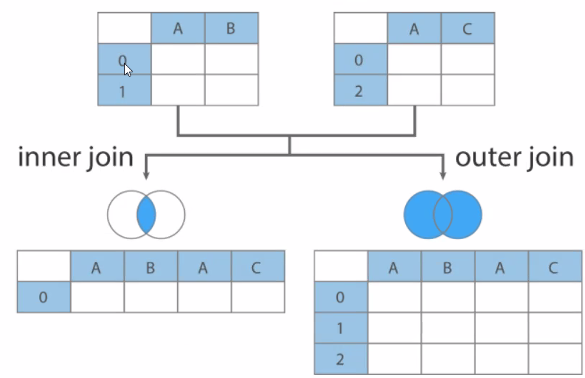

![](./img/join_inout.PNG)

**예제1. 데이터프레임 생성**

- 고객 정보를 담고 있는 데이터 프레임

In [3]:
# 예시 df 생성 - 고객 정보를 담고 있는 df
df1 = pd.DataFrame({'고객번호' : [1001, 1002, 1003, 1004, 1005, 1006, 1007],
                   '이름' : ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']},
                   columns = ['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


- 예금 정보 데이터 프레임

In [4]:
# 예제 df 생성 - 예금 정보 df
df2 = pd.DataFrame({'고객번호' : [1001, 1001, 1005, 1006, 1008, 1001],
                    '금액' : [10000, 20000, 15000, 5000, 100000, 30000]},
                    columns = ['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


**merge 명령으로 두 df를 병합하는 문법**

merge(df1, df2, how, on, left_on, right_on, left_index, right_index)

- 모든 인수 생략(병합 df를 제외한) 공통 이름을 갖고 있는 열
- '고객번호'가 키가 됨
- 양쪽에 모두 존재하는 키의 data만 보여주는 **`inner join`** 방식을 사용
    - pandas.merge(df1, df2)
    - df1.merge(df2)

In [6]:
df1.head(2)
df2.tail(2)

,고객번호,이름
0,1001,둘리
1,1002,도우너


,고객번호,금액
4,1008,100000
5,1001,30000


**데이터프레임1.merge(데이터프레임2)**
- 기준 데이터프레임은 df1

In [7]:
df1.merge(df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [10]:
# df2가 기준 데이터프레임인 경우
df2.merge(df1)

,고객번호,금액,이름
0,1001,10000,둘리
1,1001,20000,둘리
2,1001,30000,둘리
3,1005,15000,희동
4,1006,5000,마이콜


**pandas.merge(데이터프레임1, 데이터프레임2)**
- 기준데이터 프레임은 왼쪽에

In [8]:
# 기준 데이터 프레임  : 왼쪽에 나타남
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


### how 인수를 사용한 다양한 병합

**merge( , how = 'outer')**
- how = inner/outer/left/right
    - how=left : 왼쪽 df에 있는 모든 키의 데이터는 표시
    - how=right : 오른쪽 df 에 있는 모든 키의 데이터는 표시

- outer join
    - 키 값이 한쪽에만 있어도 데이터를 보여 줌
    - 어느 한 df에 데이터가 존재하지 않으면 NaN으로 표시됨

In [11]:
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


- left join

In [12]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


- right join

In [13]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


### 동일한 키 값이 있는 경우

- 키값이 같은 데이터가 여러개 있는 경우에는 있을 수 있는 모든 경우의 수를 따져서 조합을 만들어 낸다.

**예제2. 데이터프레임 생성**

- 데이터프레임1 

In [14]:
# 예제 df 생성 
# 열: 품종, 꽃잎길이
df1 = pd.DataFrame({
    '품종':['setosa','setosa','virginica','virginica'],
    '꽃잎길이':[1.4, 1.3, 1.5, 1.3]},
    columns=['품종','꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


- 데이터프레임2

In [16]:
# 열 : 품종, 꽃잎너비
df2 = pd.DataFrame({
    '품종': ['setosa','virginica','virginica','Versicolor'],
    '꽃잎너비':[0.4,0.3,0.5,0.3]},
    columns=['품종','꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,Versicolor,0.3


- df1과 df2 를 병합


    - 위 데이터에서 키 값 setosa에 대해
        - df1에는 1.4와 1.3 2개의 데이터가 있고
        - df2에는 0.4라는 1개의 데이터가 있으므로
        - 병합 데이터에는 setosa가 (1.4,0.4)(1.3,0.4)의 2 경우가 표현된다.
        

    - 키값 virginica의 경우에는 df1에 2개 df2에 2개의 데이터가 있으므로
        - 2개와 2개의 조합에 의해 4개의 데이터가 표현된다.

In [18]:
#양쪽 데이터프레임에서 공통된 키만 표현

df1.head()
df2.head()
pd.merge(df1, df2)

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,Versicolor,0.3


,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


### merge()의 on 인수를 사용하여 기준열 명시하여 병합

**key**
- 두 데이터 프레임에서 이름이 같은 열은 모두 키가 될 수 있다.
- 열이름이 같아도 키로 사용할 수 없는 열이 있으면 **on 인수로 기준열을 명시**해야 한다.

**예제3.**

In [26]:
# 예제 df
df1 = pd.DataFrame({
    '고객명':['춘향','춘향','몽룡'],
    '날짜' : ['2018-01-01','2018-01-02','2018-01-01'],
    '데이터':[20000, 30000, 100000]
})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [27]:
df2 = pd.DataFrame({
    '고객명':['춘향','몽룡'],
    '데이터':['여자','남자']
})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


**기준열을 직접 지정 : on=기준열 이름**
- 반환 결과에 동일 필드명이 있을 경우에는 필드명_x, 필드명_y로 필드명을 변경해서 표현

In [30]:
pd.merge(df1, df2, on = '고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


**키가 되는 기준열 이름이 두 데이터 프레임에서 다르게 나타나는 경우**
- **left_on, right_on 인수**를 사용해서 기준열을 명시해야 함

**예제4.**

In [31]:
df1=pd.DataFrame({
    '이름' :['영희','철수','철수'],
    '성적' :[90,80,80]
})
df2 = pd.DataFrame({
    '성명' :['영희','영희','철수'],
    '성적2':[100,80,90]
})
df1.head(1)
df2.head(1)

,이름,성적
0,영희,90


,성명,성적2
0,영희,100


In [32]:
pd.merge(df1, df2, left_on = '이름', right_on = '성명')
# 양쪽에서 기준이되는 열의 이름이 다르기 때문에 on인수를 두번사용
# 출력결과는 양쪽 필드 명이 다르기 때문에 기준열이 모두나타난다.

,이름,성적,성명,성적2
0,영희,90,영희,100
1,영희,90,영희,80
2,철수,80,철수,90
3,철수,80,철수,90


### 인덱스 기준으로 병합

: 일반 데이터 열이 아닌 인덱스를 기준으로 merge 할수도 있음


- 인덱스를 기준열로 사용하려면
    - left_index = True 또는
    - right_index = True 설정을 하게 됨

**예제5. 데이터프레임의 인덱스를 기준열로 사용하는 경우**

In [35]:
df1 = pd.DataFrame({
    '도시': ['서울','서울','서울','부산','부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]    
})

df2=pd.DataFrame(
    np.arange(12).reshape((6,2)),
    index=[['부산','부산','서울','서울','서울','서울'],
          [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1','데이터2']
)

df1
df2

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [37]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index = True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


**예제6. 두 데이터프레임의 key가 모두 인덱스인 경우**

In [38]:
df1 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],
                   index=['a','c','e'],
                   columns=['서울','부산'])
df1

df2=pd.DataFrame([[7.,8.],[9.,10.],
                  [11.,12.],[13.,14.]],
                 index=['b','c','d','e'],
                 columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


**두 데이터프레임의 인덱스가 키로 사용될 경우**

In [39]:
# 두 데이터프레임의 key가 모두 인덱스인 경우
pd.merge(df1, df2, how='outer', left_index=True, right_index=True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


## 2) join()을 이용한 병합

**Dataframe1.join(Dataframe2. how='left/right/inner/outer', on=keys)**

- 사용 방법은 merge()와 동일
- 행 인덱스를 기준으로 결합

- Dataframe1.join(Dataframe2. how='left')가 default값

In [41]:
df1.join(df2, how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


### 연습문제1.
- 두 개의 데이터프레임을 만들고 merge 명령을 병합한다.
- 단, 데이터 프레임은 다음 조건을 만족해야 한다.
    1. 각각 5X5 이상의 크기를 가진다.
    2. 공통열을 하나이상 갖는다. 
        - 다만 공통열의 이름은 서로 다르게 할 것
    3. merge의 경우를 inner, outer, left, right 4개의 형태로 출력할 것
    4. 지정된 인덱스와 컬럼명을 갖는다. 

In [42]:
data = [[22, 60.1, 170.5, '남', '서울'], 
        [45, 51.3, 157.3, '여', '부산'], 
        [22, 68.3,180.1,  '남', '대구'],
        [33, 88.3, 190.2, '남', '제주'], 
        [27, 48.3, 160.1, '여', '강릉']]

df1 = pd.DataFrame(data, 
                   index=['홍길동', '이몽룡', '성춘향','변학도','김연아'], 
                   columns=["나이", "몸무게", "키", "성별" ,"주소"])
df1

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,45,51.3,157.3,여,부산
성춘향,22,68.3,180.1,남,대구
변학도,33,88.3,190.2,남,제주
김연아,27,48.3,160.1,여,강릉


In [43]:
data = [[22, 60.1, 170.5, '남', '서울'], 
        [45, 51.3, 157.3, '여', '부산'], 
        [22, 68.3,180.1,  '남', '울산'],
        [33, 88.3, 190.2, '남', '제주'], 
        [27, 48.3, 160.1, '여', '광주']]
df2 = pd.DataFrame(data,
                   index=[1,2,3,4,5],
                   columns=["나이", "몸무게", "키", "성별" ,"지역"])
df2

,나이,몸무게,키,성별,지역
1,22,60.1,170.5,남,서울
2,45,51.3,157.3,여,부산
3,22,68.3,180.1,남,울산
4,33,88.3,190.2,남,제주
5,27,48.3,160.1,여,광주


,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22,60.1,170.5,남,서울,22,60.1,170.5,남,서울
1,45,51.3,157.3,여,부산,45,51.3,157.3,여,부산
2,33,88.3,190.2,남,제주,33,88.3,190.2,남,제주


,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22.0,60.1,170.5,남,서울,22.0,60.1,170.5,남,서울
1,45.0,51.3,157.3,여,부산,45.0,51.3,157.3,여,부산
2,22.0,68.3,180.1,남,대구,NaN,NaN,NaN,NaN,NaN
3,33.0,88.3,190.2,남,제주,33.0,88.3,190.2,남,제주
4,27.0,48.3,160.1,여,강릉,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,22.0,68.3,180.1,남,울산
6,NaN,NaN,NaN,NaN,NaN,27.0,48.3,160.1,여,광주


,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22,60.1,170.5,남,서울,22.0,60.1,170.5,남,서울
1,45,51.3,157.3,여,부산,45.0,51.3,157.3,여,부산
2,22,68.3,180.1,남,대구,NaN,NaN,NaN,NaN,NaN
3,33,88.3,190.2,남,제주,33.0,88.3,190.2,남,제주
4,27,48.3,160.1,여,강릉,NaN,NaN,NaN,NaN,NaN


,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22.0,60.1,170.5,남,서울,22,60.1,170.5,남,서울
1,45.0,51.3,157.3,여,부산,45,51.3,157.3,여,부산
2,NaN,NaN,NaN,NaN,NaN,22,68.3,180.1,남,울산
3,33.0,88.3,190.2,남,제주,33,88.3,190.2,남,제주
4,NaN,NaN,NaN,NaN,NaN,27,48.3,160.1,여,광주


------------------------------

## 2. 데이터 연결

### concat() 명령을 사용한 데이터 연결

**pd.concat([left, right], axis=0, join='outer', ignore_index=False, keys=None)**

- left, right :  Series, DataFrame, Panel object 리스트
- axis :  0은 위+아래로 합치기, 1은 왼쪽+오른쪽으로 합치기
- join :  'outer': 합집합(union), 'inner': 교집합(intersection)
- ignore_index :  False: 기존 index 유지, True: 기존 index 무시
- keys :  계층적 index 사용하려면 keys 튜플 입력

- 기준열 없이 데이터를 합친다
- 위 아래로 데이터를 결합하는 **행 결합(row bind)**이 기본
- axis 속성을 1로 설정하면 열 결합(column bind)을 수행
- 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 **인덱스 값이 중복**될 수 있다.

#### 행결합 : pd.concat([df1,df2], axis=0)

![](./img/join_inout_row.PNG)

#### 열결합 :  pd.concat([df1,df2],axis=1)

![](./img/concat_column.png)

### 두 시리즈 데이터 연결

**예제1.**

- 두 시리즈 데이터 생성

In [44]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])
s1
s2

A    0
B    1
dtype: int64

A    2
B    3
C    4
dtype: int64

- 두 시리즈 데이터 연결

In [45]:
# 두 시리즈 연결 : 행방향으로 합침
pd.concat([s1, s2])

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [46]:
# 두 시리즈 연결 : 열방향으로 합침
pd.concat([s1, s2], axis=1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


### 두 데이터프레임 연결

**예제2.**
- 데이터프레임 생성

In [47]:
# concat 연결
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'E': ['C4', 'C5', 'C6', 'C7'],
                    'F': ['D4', 'D5', 'D6', 'D7']},
                   index=[0, 1, 2, 3])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[1,2,3,4])
df1
df2
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,E,F
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


,A,B,C,D
1,A8,B8,C8,D8
2,A9,B9,C9,D9
3,A10,B10,C10,D10
4,A11,B11,C11,D11


**데이터 프레임 행 결합**

- 행을 모두 표현
- join 인수 생략 : 기본값이 'outer'로 지정되어 있음 (모든 열 표현)

In [59]:
result = pd.concat([df1, df2])
result

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


In [60]:
pd.concat([df1, df2], join='outer')

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


**인덱스가 중복된 경우 : 인덱싱을 수행하면?**

In [61]:
# 인덱스가 중복 된 경우 인덱싱을 수행 하면 ?
# result
result.loc[0]

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4


**인덱스가 중복되므로 기본 인덱스로 재설정**
- 인덱스 열 제거 : drop=True

In [62]:
# 인덱스가 중복 되므로 기본 인덱스로 재 설정
# 인덱스 열은 제거

result.reset_index()

,index,A,B,C,D,E,F
0,0,A0,B0,C0,D0,NaN,NaN
1,1,A1,B1,C1,D1,NaN,NaN
2,2,A2,B2,C2,D2,NaN,NaN
3,3,A3,B3,C3,D3,NaN,NaN
4,0,A4,B4,NaN,NaN,C4,D4
5,1,A5,B5,NaN,NaN,C5,D5
6,2,A6,B6,NaN,NaN,C6,D6
7,3,A7,B7,NaN,NaN,C7,D7


**concat( , join = 'inner')**

: 공통된 열만 표현

In [64]:
# concat() : 행결합 - 행은 모두 표현
# join='inner' 이므로 열은 공통열만 표현

pd.concat([df1, df2], join='inner')

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


**concat( , ignore_index = True)**

: 기존 인덱스 제거 후 제로베이스 인덱스 설정

In [65]:
# ignore_index = True : 기존 인덱스 제거 후 제로베이스 인덱스 설정

pd.concat([df1, df2], join='inner', ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7


**concat( , keys=[])**

: 상위 레벨 인덱스 설정

In [74]:
# keys 파라미터를 통해 상위레벨 인덱스 설정 가능

result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

# 3개의 df이므로 각 df에 대응되는 상위 레벨 인덱스를 정의

A    B    C    D    E    F
x 0   A0   B0   C0   D0  NaN  NaN
  1   A1   B1   C1   D1  NaN  NaN
  2   A2   B2   C2   D2  NaN  NaN
  3   A3   B3   C3   D3  NaN  NaN
y 0   A4   B4  NaN  NaN   C4   D4
  1   A5   B5  NaN  NaN   C5   D5
  2   A6   B6  NaN  NaN   C6   D6
  3   A7   B7  NaN  NaN   C7   D7
z 1   A8   B8   C8   D8  NaN  NaN
  2   A9   B9   C9   D9  NaN  NaN
  3  A10  B10  C10  D10  NaN  NaN
  4  A11  B11  C11  D11  NaN  NaN

- 다중 인덱스인 경우 데이터 접근 : .연산자를 이용한 체인 인덱싱


In [75]:
# 다중 인덱싱 : . 연산자를 이용한 접근
result.loc['z'].loc[1:2]

,A,B,C,D,E,F
1,A8,B8,C8,D8,NaN,NaN
2,A9,B9,C9,D9,NaN,NaN


### concat() 를 이용한 열 결합

**pd.concat([df1,df2], axis=1, join='inner/outer')**

- axis=1
    - 데이터프레임들의 열을 결합


- join='outer' : 기본 설정
    - 모든 행을 표시하고 해당 행의 데이터가 없는 열의 원소는 NaN으로 표시


- join='inner'
    - 병합하는 데이터프레임에 중복되는 인덱스의 행만 표시

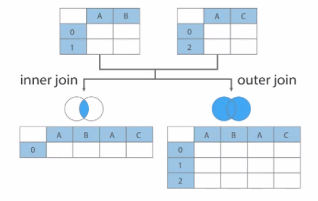

**예제3.**

In [76]:
# 예제 df 생성

df1=pd.DataFrame(
    np.arange(6).reshape(3,2),
    index=['a','b','c'],
    columns=['데이터1','데이터2']
)
df1
df2=pd.DataFrame(
    5+np.arange(4).reshape(2,2),
    index=['a','c'],
    columns=['데이터2','데이터4']
)
df2

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


,데이터2,데이터4
a,5,6
c,7,8


- concat( , axis=1, )을 이용한 열 결합 : outer join이 기본으로 적용

In [78]:
pd.concat([df1, df2], axis=1, join='outer')
# join ='outer'가 기본이므로 생략 가능

,데이터1,데이터2,데이터2,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


- concat( , axis=0, )을 이용한 행 결합

In [79]:
# 행 결합
pd.concat([df1, df2], axis=0, join='outer')

,데이터1,데이터2,데이터4
a,0.0,1,NaN
b,2.0,3,NaN
c,4.0,5,NaN
a,NaN,5,6.0
c,NaN,7,8.0


- inner join이 적용된 열 결합

In [80]:
pd.concat([df1, df2], axis=0, join='inner')

,데이터2
a,1
b,3
c,5
a,5
c,7


### 연습문제2. 
- 어느회사의 전반기(1월-6월)실적을 나타내는 데이터프레임과
후반기(7월-12월)실적을 나타내는 데이터 프레임을 작성한 후
합친다(단순병합)
- 실적 정보는 "매출","비용","이익"으로 이루어진다.
- 이익=매출-비용 : 가공필드로 생성
    
- 또한 1년간의 총 실적을 마지막 열로 덧붙인다.

**상반기(1-6월) 실적 데이터프레임 생성**
- month 변수 생성

In [84]:
month = [str(i) + '월' for i in range(1, 13)]
month

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

- 1~6월의 매출, 비용 데이터 생성(딕셔너리)

In [87]:
# 매출, 비용 data random  생성
np.random.seed(3)
data={}
for i in month[0:6]:
    data[i]=np.random.randint(1, 100, 2)
data

{'1월': array([25,  4]),
 '2월': array([57, 73]),
 '3월': array([ 1, 22]),
 '4월': array([20, 75]),
 '5월': array([42, 11]),
 '6월': array([22, 39])}

- 1~6월의 매출과 비용 데이터프레임 생성

In [97]:
# 데이터프레임 생성
df1 = pd.DataFrame(data, index=['매출', '비용'])
df1

,1월,2월,3월,4월,5월,6월
매출,25,57,1,20,42,22
비용,4,73,22,75,11,39


- '이익' 행이 추가된 데이터 프레임 작성

In [98]:
# '이익' 행 생성
df2 = pd.DataFrame({'이익' : [21, -16, -21, -55, 31, -17]},
                   index = ['1월', '2월', '3월', '4월', '5월', '6월'])
df2 = df2.T
pd.concat([df1, df2])

,1월,2월,3월,4월,5월,6월
매출,25,57,1,20,42,22
비용,4,73,22,75,11,39
이익,21,-16,-21,-55,31,-17


**하반기(7~12월) 실적 데이터프레임 생성**
- 매출, 비용으로 구성

In [124]:
# 매출, 비용 data random  생성
np.random.seed(3)
data2={}
for i in month[6:12]:
    data2[i]=np.random.randint(1, 100, 2)
data2

# 데이터프레임 생성
df3 = pd.DataFrame(data2, index=['매출', '비용'])
df3

# 가공 행 이익 생성
df4 = pd.DataFrame({'이익' : [76, -49, 25, -55, 68, 64]},
                   index = ['7월', '8월', '9월', '10월', '11월', '12월'])
df4 = df4.T
pd.concat([df3, df4])

## SEED 값이 다른데 ... 바꿔야 할 것 같음

{'7월': array([25,  4]),
 '8월': array([57, 73]),
 '9월': array([ 1, 22]),
 '10월': array([20, 75]),
 '11월': array([42, 11]),
 '12월': array([22, 39])}

,7월,8월,9월,10월,11월,12월
매출,25,57,1,20,42,22
비용,4,73,22,75,11,39


,7월,8월,9월,10월,11월,12월
매출,25,57,1,20,42,22
비용,4,73,22,75,11,39
이익,76,-49,25,-55,68,64


**상반기 실적 데이터프레임과 하반기 실적 데이터프레임 연결**

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
매출,25,57,1,20,42,22,97,45,40,27,91,67
비용,4,73,22,75,11,39,21,94,15,82,23,3
이익,21,-16,-21,-55,31,-17,76,-49,25,-55,68,64


- '총실적' 열 추가

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총실적
매출,25,57,1,20,42,22,97,45,40,27,91,67,534
비용,4,73,22,75,11,39,21,94,15,82,23,3,462
이익,21,-16,-21,-55,31,-17,76,-49,25,-55,68,64,72
